In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Specify the File Path
file_path = '/Users/kwonheejin/Documents/딥러닝 응용/데이터 셋/car+evaluation/car.data'

# Load File 
data = pd.read_csv(file_path, header=None)

column_names = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_Boot', 'Safety','Class']

# 데이터프레임에 컬럼 이름 설정
data.columns = column_names

# A quick view
data.head()

,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Text(0.5, 1.0, 'Label')

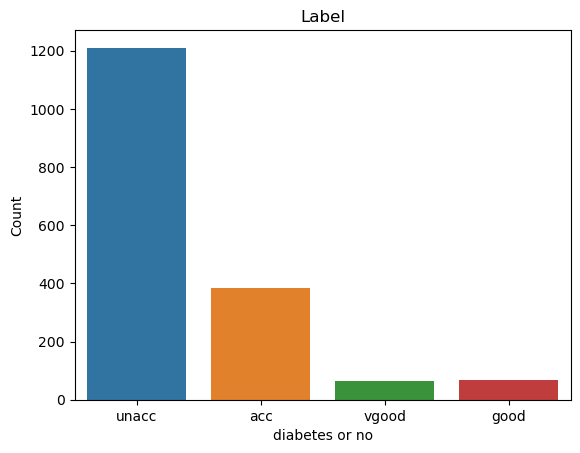

In [3]:
sns.countplot(data = data, x="Class")
plt.xlabel("diabetes or no")
plt.ylabel("Count")
plt.title("Label")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1728 non-null   object
 1   Maint     1728 non-null   object
 2   Doors     1728 non-null   object
 3   Persons   1728 non-null   object
 4   Lug_Boot  1728 non-null   object
 5   Safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in data.columns:

    data[i]=le.fit_transform(data[i])

In [6]:
data.isna().sum()

Buying      0
Maint       0
Doors       0
Persons     0
Lug_Boot    0
Safety      0
Class       0
dtype: int64

In [7]:
data

,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


<Axes: title={'center': 'Analyze Correlation of Features'}>

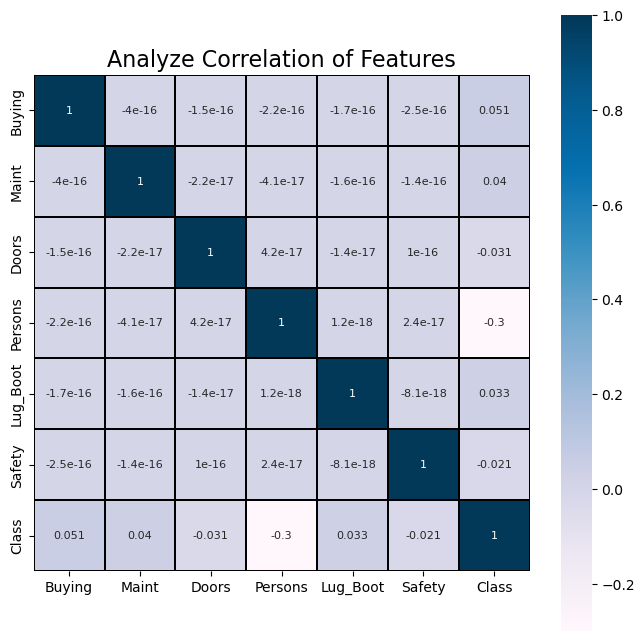

In [8]:
colormap = plt.cm.PuBu
plt.figure(figsize=(8, 8))
plt.title("Analyze Correlation of Features", y = 1.0, size = 16)
sns.heatmap(data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "black", annot = True, annot_kws = {"size" : 8})

In [9]:
#Splitting the data into training and test test
X = data.iloc[:,0:5].values
y = data.iloc[:,6].values

Y = pd.get_dummies(y).values

from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [10]:
X

array([[3, 3, 0, 0, 2],
       [3, 3, 0, 0, 2],
       [3, 3, 0, 0, 2],
       ...,
       [1, 1, 3, 2, 0],
       [1, 1, 3, 2, 0],
       [1, 1, 3, 2, 0]])

In [11]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(4,input_shape=(5,),activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='sigmoid'))

model.compile(Adam(lr=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 4)                 24        
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
Total params: 84 (336.00 Byte)
Trainable params: 84 (336.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model_history=model.fit(x=x_train, y=y_train, epochs=100, batch_size=32,validation_data= (x_test,y_test))
y_pred = model.predict(x_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 0s 1ms/step - loss: 0.5229 - accuracy: 0.3748 - val_loss: 0.4830 - val_accuracy: 0.4306
Epoch 2/100
44/44 [==============================] - 0s 543us/step - loss: 0.4622 - accuracy: 0.5876 - val_loss: 0.4339 - val_accuracy: 0.6936
Epoch 3/100
44/44 [==============================] - 0s 470us/step - loss: 0.4223 - accuracy: 0.7019 - val_loss: 0.4123 - val_accuracy: 0.6936
Epoch 4/100
44/44 [==============================] - 0s 476us/step - loss: 0.4047 - accuracy: 0.7019 - val_loss: 0.4003 - val_accuracy: 0.6936
Epoch 5/100
44/44 [==============================] - 0s 502us/step - loss: 0.3955 - accuracy: 0.7019 - val_loss: 0.3921 - val_accuracy: 0.6936
Epoch 6/100
44/44 [==============================] - 0s 485us/step - loss: 0.3884 - accuracy: 0.7019 - val_loss: 0.3867 - val_accuracy: 0.6936
Epoch 7/100
44/44 [==============================] - 0s 506us/step - loss: 0.3835 - accuracy: 0.7019 - val_loss: 0.3829 - val_accuracy: 0.6936
E

Epoch 58/100
44/44 [==============================] - 0s 521us/step - loss: 0.2831 - accuracy: 0.7019 - val_loss: 0.2973 - val_accuracy: 0.6936
Epoch 59/100
44/44 [==============================] - 0s 502us/step - loss: 0.2827 - accuracy: 0.7019 - val_loss: 0.2976 - val_accuracy: 0.6936
Epoch 60/100
44/44 [==============================] - 0s 469us/step - loss: 0.2824 - accuracy: 0.7019 - val_loss: 0.2972 - val_accuracy: 0.6936
Epoch 61/100
44/44 [==============================] - 0s 489us/step - loss: 0.2822 - accuracy: 0.7019 - val_loss: 0.2979 - val_accuracy: 0.6936
Epoch 62/100
44/44 [==============================] - 0s 490us/step - loss: 0.2815 - accuracy: 0.7019 - val_loss: 0.2964 - val_accuracy: 0.6936
Epoch 63/100
44/44 [==============================] - 0s 466us/step - loss: 0.2810 - accuracy: 0.7019 - val_loss: 0.2953 - val_accuracy: 0.6936
Epoch 64/100
44/44 [==============================] - 0s 470us/step - loss: 0.2816 - accuracy: 0.7019 - val_loss: 0.2961 - val_accuracy:

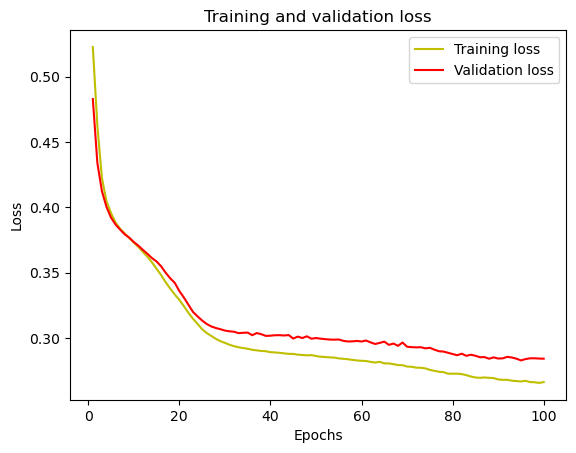

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

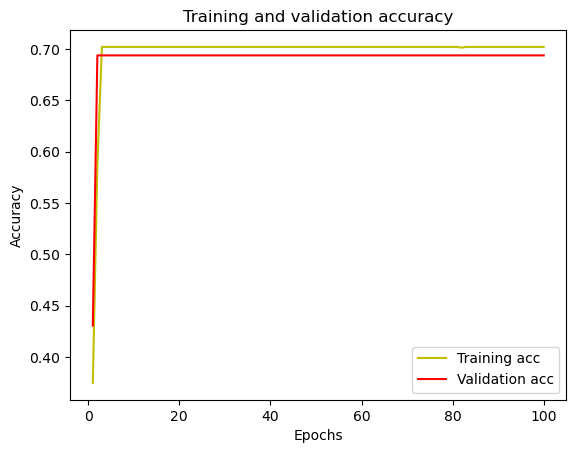

In [34]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.00      0.00      0.00        17
           2       0.69      1.00      0.82       240
           3       0.00      0.00      0.00        10

    accuracy                           0.69       346
   macro avg       0.17      0.25      0.20       346
weighted avg       0.48      0.69      0.57       346

[[  0   0  79   0]
 [  0   0  17   0]
 [  0   0 240   0]
 [  0   0  10   0]]
